<HTML>
    <head></head>
<body background="Resources/silly.jpg">
    <center><H2>Heroes of Pygmoli HW 4</H2></center>
    
</body>
    
</HTML>

Congratulations! After a lot of hard work in the data munging mines, you've landed a job as Lead Analyst for an independent gaming company. You've been assigned the task of analyzing the data for their most recent fantasy game Heroes of Pymoli.

Like many others in its genre, the game is free-to-play, but players are encouraged to purchase optional items that enhance their playing experience. As a first task, the company would like you to generate a report that breaks down the game's purchasing data into meaningful insights.

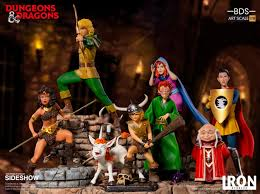

In [149]:
import numpy as np
import pandas as pd


### Player Count: 
Total Number of Players

In [161]:
purchase_frame = pd.read_csv("Resources/purchase_data.csv", index_col = "Purchase ID")
count_SN = purchase_frame["SN"].nunique()
print("Total Players: " + str(count_SN))


Total Players: 576


### Purchasing Analysis (Total)

*  Number of Unique Items
*  Average Purchase Price
*  Total Number of Purchases
*  Total Revenue


In [159]:
count_IN = purchase_frame["Item Name"].nunique()
Total_Dollars = purchase_frame["Price"].sum()
Average_PP = round((Total_Dollars/count_IN), 2)
Total_Purchases = purchase_frame["SN"].count()

In [163]:
summary_table = pd.DataFrame({"No. Unique Items": [count_IN] ,
                              "Average Purchase Price": [Average_PP],
                              "Total Number of Purchases": [Total_Purchases],
                              "Total Revenue": [Total_Dollars]})
summary_table

,No. Unique Items,Average Purchase Price,Total Number of Purchases,Total Revenue
0,179,13.29,780,2379.77


### Purchasing Analysis (Gender)

*  The below each broken by gender
    *  Purchase Count
    *  Average Purchase Price
    *  Total Purchase Value
    *  Average Purchase Total per Person by Gender


In [260]:
gender_frame = purchase_frame.groupby("Gender")["Item Name"].count()
fem_pc = gender_frame["Female"]
male_pc = gender_frame["Male"]
other_pc = gender_frame["Other / Non-Disclosed"]

gender_frame2 = purchase_frame.groupby("Gender")["Price"].sum()

fem_tpv = gender_frame2["Female"]
male_tpv = gender_frame2["Male"]
other_tpv = gender_frame2["Other / Non-Disclosed"]

fem_app = round(fem_tpv/fem_pc, 2)
male_app = round(male_tpv/male_pc, 2)
other_app = round(other_tpv/other_pc, 2)

gf3 = purchase_frame.groupby(['Gender','SN']).sum()["Price"] 
gf4 = gf3.groupby("Gender").mean()
fem_app_pp = gf4["Female"]
male_app_pp = gf4["Male"]
other_app_pp = gf4["Other / Non-Disclosed"]

In [265]:
#Summary Table goes here
fem_table = pd.DataFrame({"Metric Group": "Female",
                          "Purchase Count": [fem_pc],
                          "Total Purchase Value": [fem_tpv],
                          "Purchase Price": [fem_app], 
                          "Ave Purchase Price per Person": [fem_app_pp]
                         })

male_table = pd.DataFrame({"Metric Group": "Male",
                          "Purchase Count": [male_pc],
                          "Total Purchase Value": [male_tpv],
                          "Purchase Price": [male_app], 
                          "Ave Purchase Price per Person": [male_app_pp]})

other_table = pd.DataFrame({"Metric Group": "Other / Non-Disclosed",
                          "Purchase Count": [other_pc],
                          "Total Purchase Value": [other_tpv],
                          "Purchase Price": [other_app], 
                          "Ave Purchase Price per Person": [other_app_pp]})

final = pd.concat([fem_table, male_table, other_table])
final

,Metric Group,Purchase Count,Total Purchase Value,Purchase Price,Ave Purchase Price per Person
0,Female,113,361.94,3.20,4.468395
0,Male,652,1967.64,3.02,4.065372
0,Other / Non-Disclosed,15,50.19,3.35,4.562727


### Most Popular Items

*  Identify the 5 most popular items by purchase count, then list (in a table):
  *  Item ID
  *  Item Name
  *  Purchase Count
  *  Item Price
  *  Total Purchase Value

In [216]:
desc_frame = purchase_frame[["Item ID", "Item Name", "Price"]]
desc_frame

popular_frame = purchase_frame.groupby("Item ID")["Item ID"].count().sort_values(ascending=False).nlargest(5).reset_index(name='purchase count')
popular_frame

fm = pd.merge(desc_frame, popular_frame)
fm = fm.drop_duplicates()
fm

tpv = fm["Price"] * fm["purchase count"]
fm["Total Purchase Value"] = tpv
final_frame = fm[["Item ID", "Item Name", "purchase count", "Price", "Total Purchase Value"]].sort_values(by=["purchase count"], ascending=False)
final_frame



,Item ID,Item Name,purchase count,Price,Total Purchase Value
26,178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
0,108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
17,82,Nirvana,9,4.90,44.10
38,145,Fiery Glass Crusader,9,4.58,41.22
9,92,Final Critic,8,4.88,39.04


### Most Profitable Items

*  Identify the 5 most profitable items by total purchase value, then list (in a table):
  *  Item ID
  *  Item Name
  *  Purchase Count
  *  Item Price
  *  Total Purchase Value

In [268]:
profitable_frame = purchase_frame.groupby("Item ID")["Price"].sum().sort_values(ascending=False).nlargest(5).reset_index(name='total purchase value')
profitable_frame


desc_frame = purchase_frame[["Item ID", "Item Name", "Price"]]
desc_frame

pp_frame = purchase_frame.groupby("Item ID")["Item ID"].count().reset_index(name='total purchase count')
pp_frame

fm = pd.merge(desc_frame, profitable_frame)
fm = fm.drop_duplicates()
fm2 = pd.merge(fm, pp_frame)
fm2

final_frame = fm2[["Item ID", "Item Name", "total purchase count", "Price", "total purchase value"]].sort_values(by=["total purchase value"], ascending=False)
final_frame

,Item ID,Item Name,total purchase count,Price,total purchase value
2,178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
1,82,Nirvana,9,4.90,44.10
3,145,Fiery Glass Crusader,9,4.58,41.22
0,92,Final Critic,8,4.88,39.04
4,103,Singed Scalpel,8,4.35,34.80


#  Three Observable Trends

*  Data Note-- there are multiple products with the same name (Final Critic) 
*  While females are a much smaller customer group, they spend more than males individually (perhaps female fans are fewer in number but a more eager customer base)
*  Men spend the least per person compared to females and other/non-disclosed individuals
*  Oathbreaker, Last Hope of the breaking Storm is both a top seller in numbers and a top earner in revenue generation